In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [18]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

Epoch 1/100
20/20 [==============================] - 0s 596us/step - loss: 0.6932 - accuracy: 0.4800
Epoch 2/100
20/20 [==============================] - 0s 648us/step - loss: 0.6931 - accuracy: 0.5150
Epoch 3/100
20/20 [==============================] - 0s 648us/step - loss: 0.6931 - accuracy: 0.5150
Epoch 4/100
20/20 [==============================] - 0s 648us/step - loss: 0.6930 - accuracy: 0.5150
Epoch 5/100
20/20 [==============================] - 0s 598us/step - loss: 0.6929 - accuracy: 0.5150
Epoch 6/100
20/20 [==============================] - 0s 598us/step - loss: 0.6928 - accuracy: 0.5150
Epoch 7/100
20/20 [==============================] - 0s 647us/step - loss: 0.6926 - accuracy: 0.5150
Epoch 8/100
20/20 [==============================] - 0s 598us/step - loss: 0.6923 - accuracy: 0.5150
Epoch 9/100
20/20 [==============================] - 0s 648us/step - loss: 0.6919 - accuracy: 0.5150
Epoch 10/100
20/20 [==============================] - 0s 598us/step - loss: 0.6914 - accura

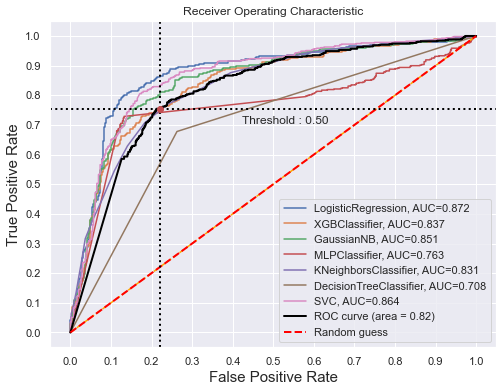

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from keras import Sequential
from keras.layers import Dense
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score

classi = Sequential()
classi.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=20))
classi.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classi.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classi.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

classi.fit(X_train,y_train, batch_size=10, epochs=100)
pred=classi.predict(X_test)
prob=classi.predict_proba(X_test)
pred =(pred>0.5)

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(),
               XGBClassifier(),
               GaussianNB(),
               MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1),
               KNeighborsClassifier(n_neighbors = 78), 
               DecisionTreeClassifier(random_state=1234),
               SVC(probability=True)
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
#plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

#plt.show()